Sentiment Analysis on Movie Review

TSV file contains data which is seperated by tabs where as csv file contains data seperated by comma (',')

In [8]:
import pandas as pd

In [9]:
raw_df=pd.read_csv('train.tsv',sep='\t')

In [12]:
raw_df

,PhraseId,SentenceId,Phrase,Sentiment
0,1,1,A series of escapades demonstrating the adage ...,1
1,2,1,A series of escapades demonstrating the adage ...,2
2,3,1,A series,2
3,4,1,A,2
4,5,1,series,2
...,...,...,...,...
156055,156056,8544,Hearst 's,2
156056,156057,8544,forced avuncular chortles,1
156057,156058,8544,avuncular chortles,3
156058,156059,8544,avuncular,2


In [13]:
test_df=pd.read_csv('test_tsv',sep='\t')

In [14]:
test_df

,PhraseId,SentenceId,Phrase
0,156061,8545,An intermittently pleasing but mostly routine ...
1,156062,8545,An intermittently pleasing but mostly routine ...
2,156063,8545,An
3,156064,8545,intermittently pleasing but mostly routine effort
4,156065,8545,intermittently pleasing but mostly routine
...,...,...,...
66287,222348,11855,"A long-winded , predictable scenario ."
66288,222349,11855,"A long-winded , predictable scenario"
66289,222350,11855,"A long-winded ,"
66290,222351,11855,A long-winded


In [87]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 66292 entries, 0 to 66291
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   PhraseId    66292 non-null  int64 
 1   SentenceId  66292 non-null  int64 
 2   Phrase      66292 non-null  object
dtypes: int64(2), object(1)
memory usage: 1.5+ MB


In [88]:
test_df.Phrase=test_df.Phrase.fillna('')

In [17]:
sub_df=pd.read_csv('sampleSubmission.csv')

In [18]:
sub_df

,PhraseId,Sentiment
0,156061,2
1,156062,2
2,156063,2
3,156064,2
4,156065,2
...,...,...
66287,222348,2
66288,222349,2
66289,222350,2
66290,222351,2


<Axes: xlabel='Sentiment'>

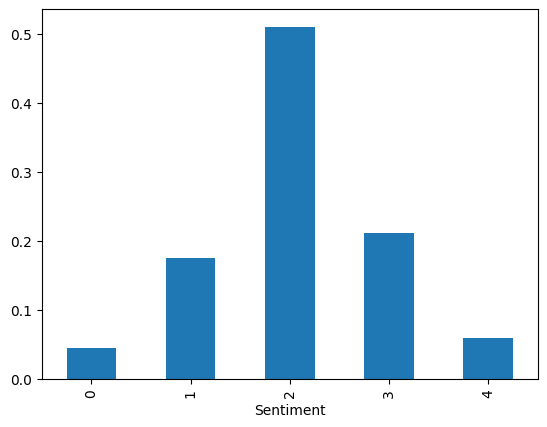

In [22]:
raw_df.Sentiment.value_counts(normalize=True).sort_index().plot(kind='bar')

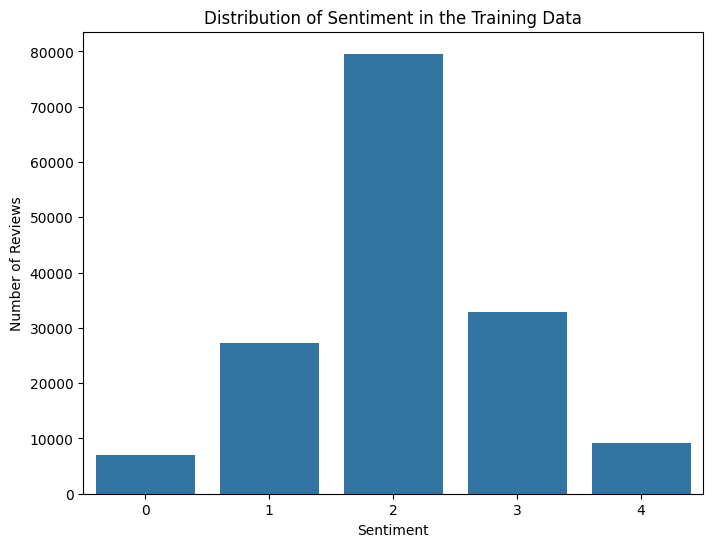

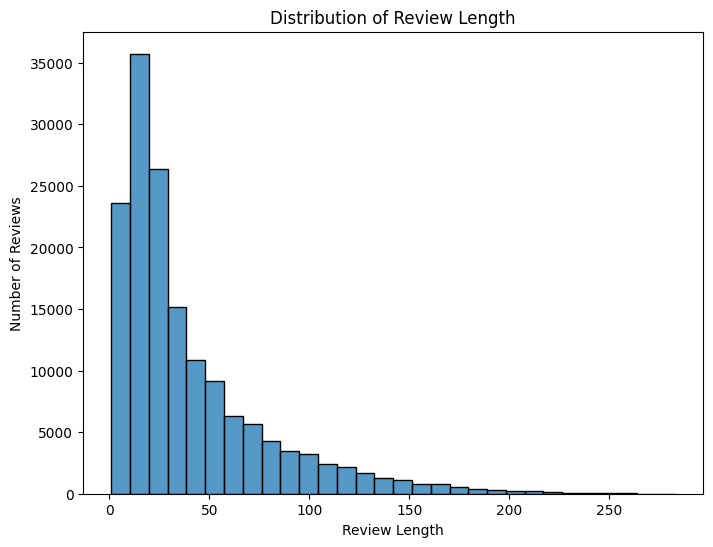

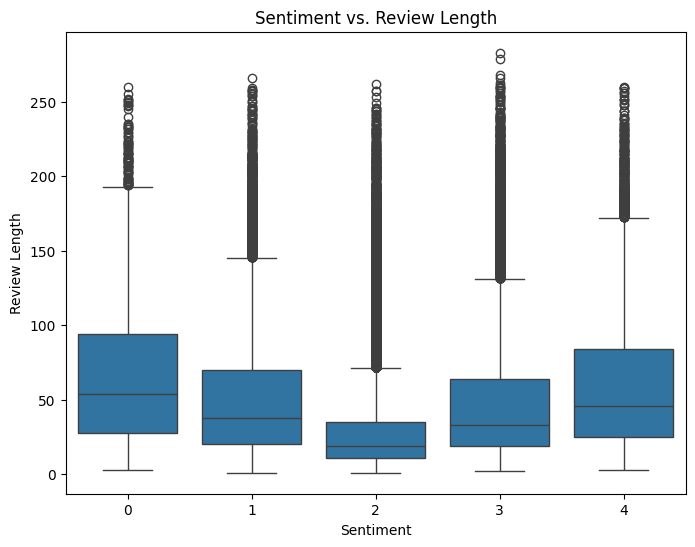

In [23]:
# prompt: apply visualization to understand the data raw_df

import matplotlib.pyplot as plt
import seaborn as sns

# Distribution of Sentiment
plt.figure(figsize=(8, 6))
sns.countplot(x='Sentiment', data=raw_df)
plt.title('Distribution of Sentiment in the Training Data')
plt.xlabel('Sentiment')
plt.ylabel('Number of Reviews')
plt.show()

# Word Cloud (Optional, requires wordcloud library)
# You can install wordcloud using: !pip install wordcloud
# from wordcloud import WordCloud
# text = " ".join(review for review in raw_df.Phrase)
# wordcloud = WordCloud(max_font_size=50, max_words=100, background_color="white").generate(text)
# plt.figure(figsize=(10, 7))
# plt.imshow(wordcloud, interpolation="bilinear")
# plt.axis("off")
# plt.show()

# Review Length Analysis
raw_df['Phrase_Length'] = raw_df['Phrase'].apply(len)
plt.figure(figsize=(8, 6))
sns.histplot(x='Phrase_Length', data=raw_df, bins=30)
plt.title('Distribution of Review Length')
plt.xlabel('Review Length')
plt.ylabel('Number of Reviews')
plt.show()

# Sentiment vs. Review Length (Optional)
plt.figure(figsize=(8, 6))
sns.boxplot(x='Sentiment', y='Phrase_Length', data=raw_df)
plt.title('Sentiment vs. Review Length')
plt.xlabel('Sentiment')
plt.ylabel('Review Length')
plt.show()


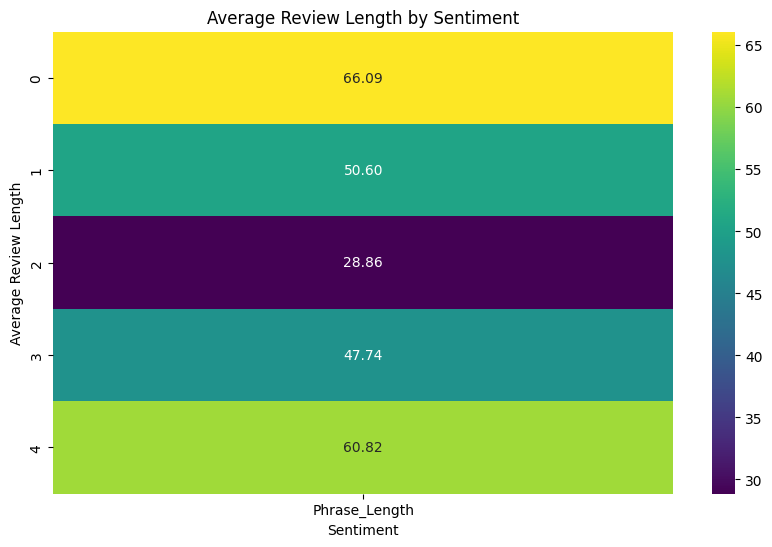

In [29]:
# prompt: visualize the review length against sentiments
# using heat

import pandas as pd
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
sns.heatmap(pd.pivot_table(raw_df, values='Phrase_Length', index='Sentiment', aggfunc='mean'), annot=True, fmt=".2f", cmap='viridis')
plt.title('Average Review Length by Sentiment')
plt.xlabel('Sentiment')
plt.ylabel('Average Review Length')
plt.show()


#Formula

#Implement TF-IDF Technique

W=tf*log(N/df)

tf=frequency of x in y

df=number of documents containing x

N=total number of documents

Outline:

1.Learn the vocabulary using TFidfVectorizer

2.Transform training and test data


Learn Vocabulary using TfidfVectorizer

1. Create custom tokenizer with stemming

2. Create a list of stop words

3. Configure and create TfidfVectorizer

4. Learn vocabulary from training set

5. View sample entries from vocabulary

In [89]:
from sklearn.feature_extraction.text import TfidfVectorizer
from nltk.stem import SnowballStemmer
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
import nltk

In [90]:
raw_df

,PhraseId,SentenceId,Phrase,Sentiment,Phrase_Length
0,1,1,A series of escapades demonstrating the adage ...,1,188
1,2,1,A series of escapades demonstrating the adage ...,2,77
2,3,1,A series,2,8
3,4,1,A,2,1
4,5,1,series,2,6
...,...,...,...,...,...
156055,156056,8544,Hearst 's,2,9
156056,156057,8544,forced avuncular chortles,1,25
156057,156058,8544,avuncular chortles,3,18
156058,156059,8544,avuncular,2,9


In [34]:
nltk.download('stopwords')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [35]:
word_tokenize('hello world')

['hello', 'world']

In [39]:
stemmer=SnowballStemmer(language='english')

In [66]:
import re

In [91]:
def tokenize(text):


  text = re.sub(r"n['’]t", " n't", text)
  text = re.sub(r"['’]re", " are", text)
  text = re.sub(r"['’]ve", " have", text)
  text = re.sub(r"['’]ll", " will", text)
  text = re.sub(r"['’]d", " would", text)
  text = re.sub(r"['’]s", "", text)  # remove possessive 's
  text = re.sub(r"['’]", "", text)  # remove any standalone apostrophes
  tokens = word_tokenize(text)
  return [stemmer.stem(token) for token in word_tokenize(text)]

In [92]:
tokenize('Is this (the) real life, or is it , fantasy?')

['is',
 'this',
 '(',
 'the',
 ')',
 'real',
 'life',
 ',',
 'or',
 'is',
 'it',
 ',',
 'fantasi',
 '?']

In [93]:
english_stopwords=stopwords.words('english')

In [94]:
stemmed_stopwords=[stemmer.stem(word) for word in english_stopwords]
additional_stopwords = ['nt', 'sha', 'wo', 'could', 'might', 'must', 'need', 'shouldv', 'would', 'youv']
stemmed_stopwords.extend(additional_stopwords)

In [74]:
vec=TfidfVectorizer(tokenizer=tokenize,stop_words=stemmed_stopwords,
                    max_features=2000,
                    ngram_range=(1,2),token_pattern=None)

In [75]:
vec.fit(raw_df.Phrase)

TfidfVectorizer(max_features=2000, ngram_range=(1, 2),
                stop_words=['i', 'me', 'my', 'myself', 'we', 'our', 'our',
                            'ourselv', 'you', "you'r", "you'v", "you'll",
                            "you'd", 'your', 'your', 'yourself', 'yourselv',
                            'he', 'him', 'his', 'himself', 'she', 'she', 'her',
                            'her', 'herself', 'it', 'it', 'it', 'itself', ...],
                token_pattern=None,
                tokenizer=<function tokenize at 0x7aa613bfde10>)

In [76]:
vec.get_feature_names_out().shape

(2000,)

In [77]:
from sklearn.model_selection import train_test_split

In [95]:
x=vec.transform(raw_df.Phrase)
y=raw_df.Sentiment
x_test=vec.transform(test_df.Phrase)

x_train,x_val,y_train,y_val=train_test_split(x,y,test_size=0.2,random_state=42)

#Model 1

In [96]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
model=RandomForestClassifier(n_estimators=100,random_state=42)
model.fit(x_train,y_train)
y_pred=model.predict(x_val)
accuracy_score(y_val,y_pred)

0.6181276432141484

#Model 2

In [104]:
from sklearn.naive_bayes import MultinomialNB
model=MultinomialNB()
model.fit(x_train,y_train)
y_pred=model.predict(x_val)
accuracy_score(y_val,y_pred)

0.5606817890554915

In [107]:
from sklearn.linear_model import LogisticRegression
model=LogisticRegression(max_iter=2000,random_state=42,solver='liblinear')
model.fit(x_train,y_train)
y_pred=model.predict(x_val)
accuracy_score(y_val,y_pred)


0.6023324362424708

In [108]:
# prompt: improve the accuracy

from sklearn.model_selection import GridSearchCV

# Define the parameter grid for Logistic Regression
param_grid = {
    'C': [0.1, 1, 10],  # Regularization strength
    'penalty': ['l1', 'l2'],  # Penalty type
    'solver': ['liblinear']  # Solver for optimization
}

# Create a Logistic Regression model
model = LogisticRegression(max_iter=2000, random_state=42)

# Create a GridSearchCV object
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, scoring='accuracy')

# Fit the grid search to the training data
grid_search.fit(x_train, y_train)

# Print the best parameters and the best score
print("Best Parameters:", grid_search.best_params_)
print("Best Accuracy:", grid_search.best_score_)

# Use the best model to make predictions on the validation set
best_model = grid_search.best_estimator_
y_pred = best_model.predict(x_val)
accuracy = accuracy_score(y_val, y_pred)
print("Validation Accuracy with Best Model:", accuracy)


Best Parameters: {'C': 10, 'penalty': 'l2', 'solver': 'liblinear'}
Best Accuracy: 0.6059608719778484
Validation Accuracy with Best Model: 0.608483916442394
